In [1]:
CONFIRMED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
DEATHS = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
RECOVERED = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from datetime import date, timedelta
from doctest import testmod

In [3]:
confirmed = pd.read_csv(CONFIRMED)
deaths = pd.read_csv(DEATHS)
recovered = pd.read_csv(RECOVERED)

In [4]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400


In [5]:
confirmed = confirmed.set_index('Country/Region')
deaths = deaths.set_index('Country/Region')
recovered = recovered.set_index('Country/Region')

In [6]:
confirmed.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,55359,55384,55402,55420,55445,55473,55492,55514,55518,55540
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,86289,87528,88671,89776,90835,91987,93075,93850,94651,95726
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,109313,109559,109782,110049,110303,110513,110711,110894,111069,111247
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,10275,10312,10352,10391,10427,10463,10503,10538,10555,10583
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,20112,20163,20210,20261,20294,20329,20366,20381,20389,20400


In [7]:
def prepare_data(dataset):
    data = dataset.iloc[:,3:].groupby(['Country/Region']).sum().transpose()
    data.index = pd.to_datetime(data.index)
    data = data.sort_index(ascending=True)
    data = pd.DataFrame(data)
    return data

In [8]:
prepare_data(confirmed).tail()["Poland"]

2021-02-13    1583621
2021-02-14    1588955
2021-02-15    1591497
2021-02-16    1596673
2021-02-17    1605372
Name: Poland, dtype: int64

In [9]:
def difference(dataset, interval=1):
    return dataset.apply(lambda x: x - x.shift(1))

In [10]:
difference(prepare_data(confirmed)).tail(10)['Poland']

2021-02-08    2431.0
2021-02-09    3999.0
2021-02-10    6960.0
2021-02-11    7013.0
2021-02-12    6378.0
2021-02-13    6585.0
2021-02-14    5334.0
2021-02-15    2542.0
2021-02-16    5176.0
2021-02-17    8699.0
Name: Poland, dtype: float64

In [11]:
def weekly_moving_average(dataset, days=7):  
    return dataset.apply(lambda x: (x + x.shift(1) + x.shift(2) + x.shift(3)
                                    + x.shift(4) + x.shift(5)+ x.shift(6))/7)

In [12]:
weekly_moving_average(difference(prepare_data(confirmed))).tail(10)[['Poland', 'China']]

Country/Region,Poland,China
2021-02-08,5256.714286,44.000000
2021-02-09,5210.000000,42.571429
2021-02-10,5232.714286,38.285714
2021-02-11,5306.714286,37.000000
2021-02-12,5353.142857,34.428571
2021-02-13,5441.571429,32.857143
2021-02-14,5528.571429,30.000000
2021-02-15,5544.428571,27.000000
2021-02-16,5712.571429,23.428571
2021-02-17,5961.000000,24.571429


In [13]:
def plot_index(data, interval):
    min_index = data.index.min().date()
    max_index = data.index.max().date()
    day = min_index
    list_index=[day]
    while day + timedelta(days=interval) < max_index:
        day = day + timedelta(days=interval)
        list_index.append(day)
    return list_index

<AxesSubplot:>

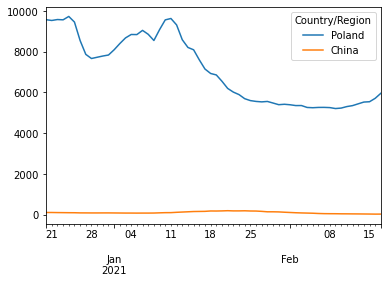

In [14]:
weekly_moving_average(difference(prepare_data(confirmed))).tail(60)[['Poland', 'China']].plot()

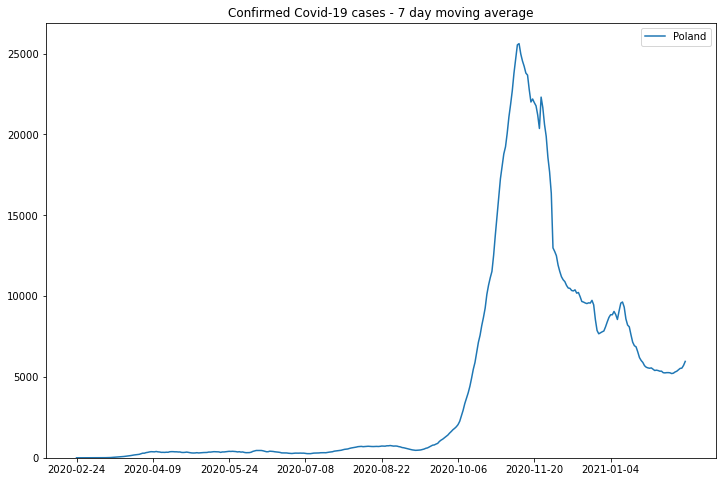

In [15]:
countries = ['Poland']
data = weekly_moving_average(difference(prepare_data(confirmed))).tail(360)[countries]
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 cases - 7 day moving average')
plt.plot(data)
plt.xticks(plot_index(data, 45))
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

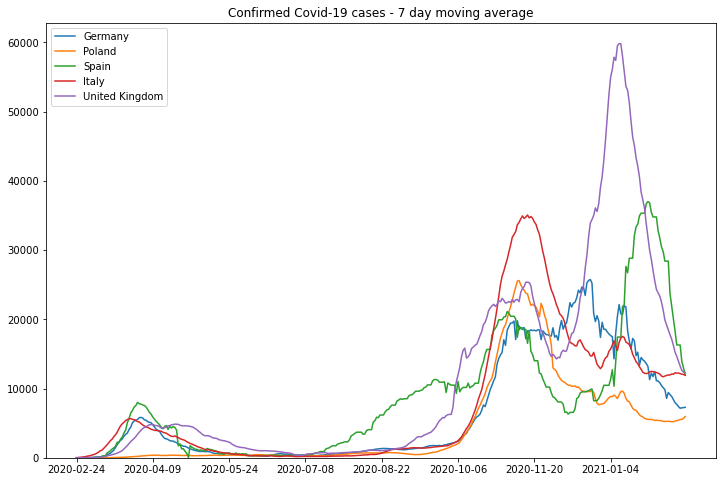

In [16]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'United Kingdom']
data = weekly_moving_average(difference(prepare_data(confirmed))).tail(360)[countries]
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 cases - 7 day moving average')
plt.plot(data)
plt.xticks(plot_index(data, 45))
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

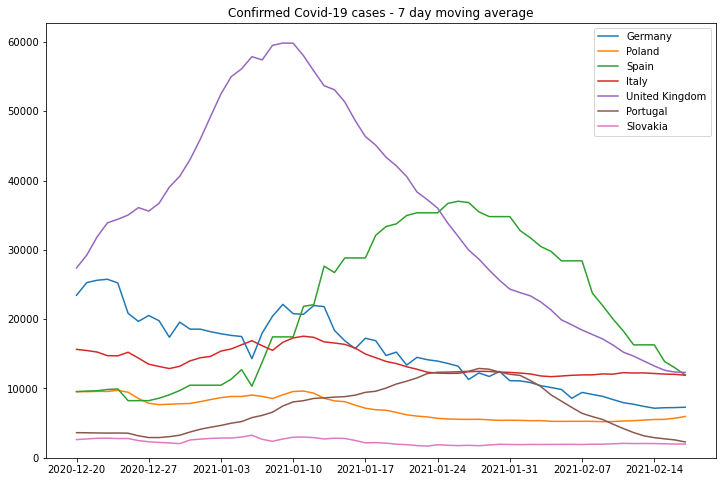

In [17]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'United Kingdom', 'Portugal', 'Slovakia']
data = weekly_moving_average(difference(prepare_data(confirmed))).tail(60)[countries]
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 cases - 7 day moving average')
plt.plot(data)
plt.xticks(plot_index(data, 7))
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

In [18]:
# Adding population data
POPULATION_DATASET = '/Users/filippawlak/API_SP.POP.TOTL_DS2_en_excel_v2_2015410.xls'
population_dataset = pd.read_excel(POPULATION_DATASET, skiprows=3)
population = pd.DataFrame(population_dataset[['Country Name','2019']]).set_index('Country Name')
population.head()

,2019
Country Name,
Aruba,106314.0
Afghanistan,38041754.0
Angola,31825295.0
Albania,2854191.0
Andorra,77142.0


In [19]:
pd.set_option('display.max_rows', 20)
display(pd.DataFrame(population.index))

,Country Name
0,Aruba
1,Afghanistan
2,Angola
3,Albania
4,Andorra
...,...
259,Kosovo
260,"Yemen, Rep."
261,South Africa
262,Zambia


In [20]:
country_dict = {
    "Czechia" : "Czech Republic",
    "Slovakia" : "Slovak Republic",
}
def cases_per_100k(df):
    df_new = pd.DataFrame()
    for country in df:
        if country in country_dict:
            country2 = country_dict[country]
            country_population = population.loc[country2][0]
        else:
            country_population = population.loc[country][0]
        df_new[country] = df[country].apply(lambda x: x/country_population * 100000)
    return df_new
        
    

In [21]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = cases_per_100k(weekly_moving_average(difference(prepare_data(deaths)))[countries])
data

,Germany,Poland,Spain,Italy,Czechia,Portugal,Slovakia
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-13,0.590965,0.645231,1.019914,0.557475,1.243842,1.709653,1.773249
2021-02-14,0.584091,0.647113,1.019914,0.545866,1.215725,1.617841,1.796822
2021-02-15,0.532195,0.639588,0.957099,0.534257,1.227775,1.470385,1.783726
2021-02-16,0.485110,0.627549,0.885484,0.513881,1.249197,1.342405,1.783726


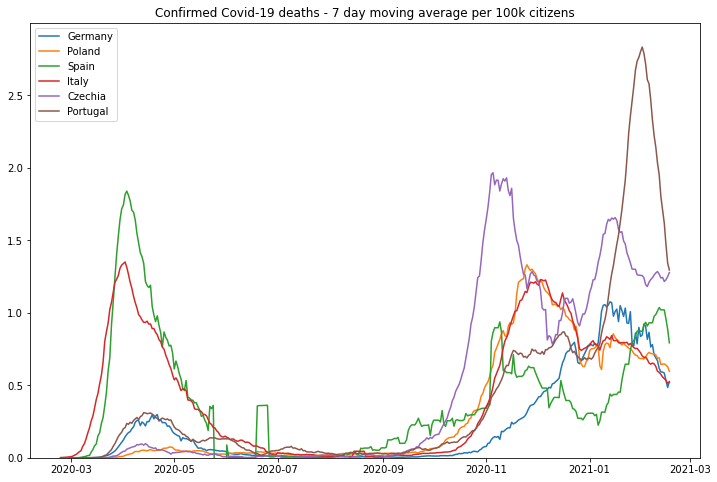

In [22]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal']
data = cases_per_100k(weekly_moving_average(difference(prepare_data(deaths)))[countries]).tail(360)
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 deaths - 7 day moving average per 100k citizens')
plt.plot(data)
#plt.xticks(plot_index(data, 40))
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

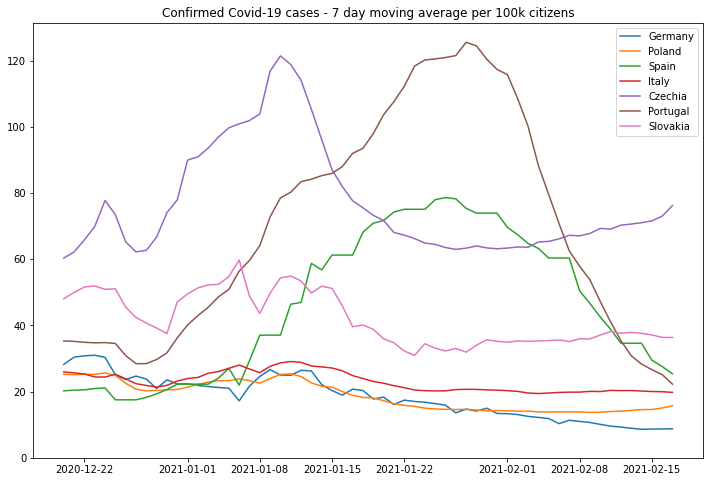

In [23]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = cases_per_100k(weekly_moving_average(difference(prepare_data(confirmed)))[countries]).tail(60)
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 cases - 7 day moving average per 100k citizens')
plt.plot(data)
# plt.xticks(plot_index)
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

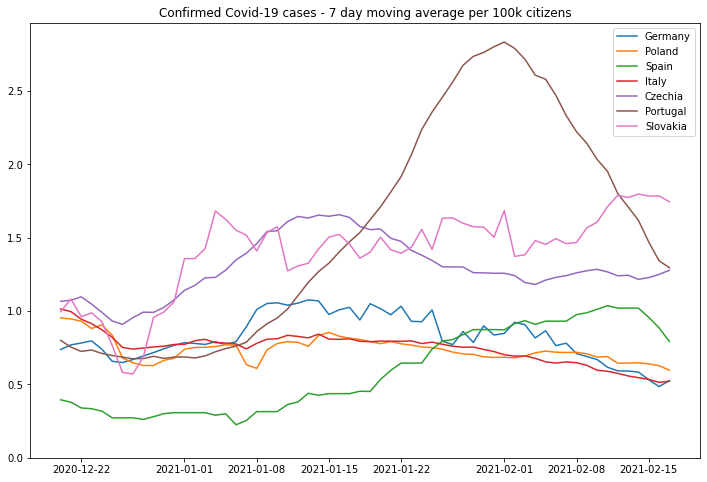

In [26]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = cases_per_100k(weekly_moving_average(difference(prepare_data(deaths)))[countries]).tail(60)
plt.figure(figsize=(12,8))
plt.title('Confirmed Covid-19 cases - 7 day moving average per 100k citizens')
plt.plot(data)
# plt.xticks(plot_index)
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()

In [27]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
deaths_to_cases = pd.DataFrame()
deaths_to_cases[countries] = cases_per_100k(weekly_moving_average(difference(prepare_data(deaths)))[countries])/cases_per_100k(weekly_moving_average(difference(prepare_data(confirmed)))[countries])
deaths_to_cases

,Germany,Poland,Spain,Italy,Czechia,Portugal,Slovakia
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2021-02-13,0.066258,0.045024,0.029471,0.027450,0.017616,0.055428,0.046819
2021-02-14,0.067884,0.044444,0.029471,0.027061,0.017121,0.057172,0.047785
2021-02-15,0.061262,0.043802,0.032448,0.026681,0.017155,0.055225,0.048056
2021-02-16,0.055664,0.041713,0.032117,0.025738,0.017112,0.053436,0.049032


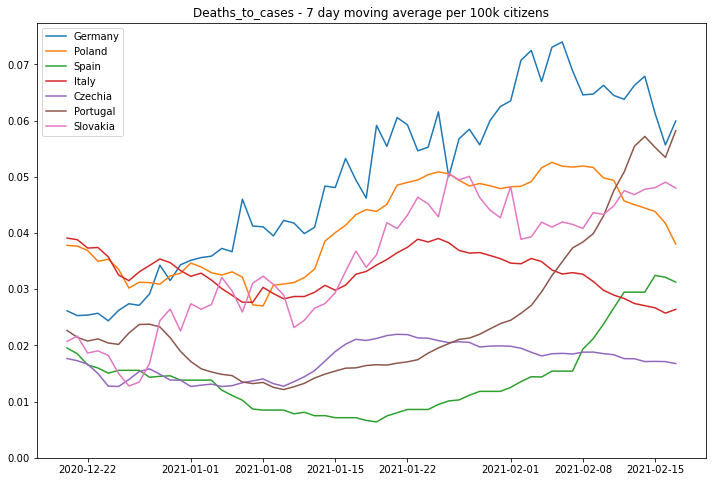

In [28]:
countries = ['Germany', 'Poland', 'Spain','Italy', 'Czechia', 'Portugal', 'Slovakia']
data = deaths_to_cases.tail(60)
plt.figure(figsize=(12,8))
plt.title('Deaths_to_cases - 7 day moving average per 100k citizens')
plt.plot(data)
plt.ylim(0, None)
plt.legend(data.columns)
plt.show()